# Webcrawler - Task 2

### a. Websites to be consumed
For this project, two different websites were scraped. One site was used to gather real estate sales descriptions data and the other was used to gather commentary on real estate assets. The following websites were scraped:
*	www.domain.com.au: This website was used to gather the real estate listing sales description data. Domain is a well-known and used property sales site where real estate agents will list properties for sale. Within each listing is a description of the property that is mainly unstructured text. Only listings within the Melbourne Region were scraped.
*	forums.whirlpool.net.au:  Whirlpool is a well-known website that contains forums on various topics including real estate in Australia. The forum used to gather the required data was the “VIC property market and price discussion” forum that discusses the Victorian property market. This website was used to gather commentary on the Victorian real estate market.

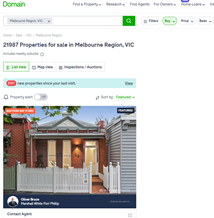 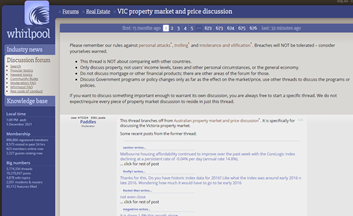  
Figure 1. Domain real estate sales website (top), Whirlpool real estate discussion forum (bottom)

### b.	Rationale for extraction
For each website, two distinct extraction methods were required given the different structure of each website and where the target data was stored. For example, the target data for the Domain website was stored on each property listing page, where as the forum comments were in a relatively flat format. This meant that there was no click through required to access the comment data. All the webscraping was completed using the Selenium webdriver to access each site.

#### Domain
The following steps were completed to scrape the description data:
1.	**Gather property website links:** Using the search pages, each listing’s website link was scraped and stored in a python dictionary. This was completed while cycling through each page of the search listings until it had reached 300 pages.
2.	**Using the gathered links, access each property listing:** Now that all the links had been gathered, these links were systematically opened by the webdriver using a for loop. An additional step was required during this process to “reveal” all of the description data as some of the data was hidden behind a “read more” button. Using the webdriver, this button was pressed, and the description data was accessed using the identified Xpath. The description data was then stored in a python dictionary.

#### Whirpool
The following steps were completed to gather the commentary data:
1.	**Access forum page:** The first page of the forum was accessed using a for loop.
2.	**Gather commentary data:** Once the forum page was accessed, the comments were gathered and stored in a python dictionary.
3.	The above steps were then completed for the remaining pages in the “VIC property market and price discussion” forum.


### c.	Content coverage of the data extracted
For each of the websites, the maximum number of pages was used to extract the data. For both websites, there appeared to be certain circumstances where data wasn’t extracted which would have been due to that listing having a format that was slightly to the other properties. For the Domain description data that was extracted, the average description length was 1934 characters from 819 total properties. 
For the Whirlpool site, at the time of extraction there were 661 pages of comments in the forum targeted, each page was scraped for the forum comments. This resulted in 12,567 total comments with an average length of 416 characters.

### d.	Complexity of the content layout
As previously discussed in this report, there were various complexities to contend with when scraping the data. This was especially applicable to the Domain sites as there were various description layouts to contend with and the requirement to click on the “read more” button to reveal the full description. Furthermore, the description data also came in various forms that required dynamic updating of the xpath to ensure all the data was captured. This format was handled using a for loop within the main for loop that attempted to capture all the description data. The whirlpool data was easier to capture, requiring less steps to gather each comment. This involved utilising two for loops, one to move from page to page and the other moved from comment to comment on each page.

### e.	Website/data copyright considerations
The Domain website conditions of use policy states:
“The Domain Group Network contains Material that is protected by copyright, trademark and other laws. Except where expressly provided otherwise in the Conditions, you may reproduce and display the Material on the Domain Group Network for your own personal, non-commercial use only. Except for the temporary copy held in your computer’s cache and a single permanent copy for your personal reference, the material may not otherwise be used, stored, reproduced, published, altered or transmitted in any form or by any means in whole or part without our prior written approval or the written approval of our licensor.”
The whirlpool website copyright policy states:
“We grant you permission to use the Services for your own personal use. You may not access, download, copy, modify, distribute, transmit, display, reproduce, publish, license, create derivative works from, transfer, or sell any part of the content or Services or use the Services for commercial purposes, whether on behalf of yourself or a third party. The entire contents, features, and functions of the Services are owned by Whirlpool, its licensors, or other providers of such material and are protected in all forms by intellectual property laws including without limitation, copyright, trademark, patent, trade secret, and other proprietary rights.”
Therefore, scraping both websites is within the conditions of use policy as the material is not currently being accessed for commercial use.

### f.	Content extractor to export the important aspects of the data
The content was extracted by using xpath addresses for the specific information required to be gathered.  For the Domain website, for loops were used to extract the data paragraph by paragraph, the xpath would be dynamically updated after each paragraph was extracted. The Selenium text() function was used to extract the description text data once the xpath had been identified within the for loop. 
The Whirlpool forum required a similar structure of extraction to extract each comment line. This was completed using a list comprehension for loop that extracted the text for each line in each comment. These were then joined together to form a full comment that could be then used as part of the dataset.

### g.	Relevant python coding

The following code was used to extract the Domain data and save it to file:

In [ ]:
#Importing packages
from selenium import webdriver
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from webdriver_manager.chrome import ChromeDriverManager

# Corpus Processing

import nltk.corpus
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot  as plt
import seaborn            as sns


driver = webdriver.Chrome('C:\\Users\\Darcy Richardson\\.wdm\\drivers\\chromedriver\\win32\\96.0.4664.45\\chromedriver.exe')


link_list=[]

#Get links from the other pages

for i in range(1,300):
    driver.get(f'https://www.domain.com.au/sale/melbourne-region-vic/house/?excludeunderoffer=1&page={i}')

    #Get links
    for i in range(0,30):
        try:
            xpath=f'//*[@id="skip-link-content"]/div[1]/div[2]/ul/li[{i}]/div/div[2]/div/a'
            raw_link=driver.find_element_by_xpath(xpath)
            link=raw_link.get_attribute('href')
            link_list.append(link)
        except:
            pass

#Get property descriptions

property_descriptions={'url':[],"description":[]}

#Search links for descriptions
for i in range(len(link_list)):
    url=link_list[i]
    driver.get(url)
    property_string=""
    
    #Click on read more button
    button = driver.find_element_by_class_name("css-1pn4141")
    driver.execute_script("arguments[0].click();", button)
    
    #find description
    
    #try xpath with first format
    try:
        xpath='/html/body/div[1]/div/div[1]/div/div[6]/div/div/div[3]/div[1]/div/div[1]/div/p'
        raw_description=driver.find_element_by_xpath(xpath).text
        property_string=property_string+" "+raw_description
    except:
        pass
    
    for i in range(0,20):
        try:   
            #try xpath with second format
            xpath=f'/html/body/div[1]/div/div[1]/div/div[6]/div/div/div[3]/div[1]/div/div/div/p[{i}]'
            raw_description=driver.find_element_by_xpath(xpath).text
            property_string=property_string+" "+raw_description
        
        except:
            pass
    property_descriptions['url'].append(url)
    property_descriptions['description'].append(property_string)

driver.quit()

descriptions_df=pd.DataFrame(property_descriptions)

descriptions_df = descriptions_df[descriptions_df.description != ""]

descriptions_df.to_csv("descriptions.csv",index=False)

The following code was used to extract the Whirlpool forum data and save it to file:

In [ ]:
#Importing packages
from selenium import webdriver
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from webdriver_manager.chrome import ChromeDriverManager

# Corpus Processing

import nltk.corpus
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot  as plt
import seaborn            as sns

driver = webdriver.Chrome('C:\\Users\\Darcy Richardson\\.wdm\\drivers\\chromedriver\\win32\\96.0.4664.45\\chromedriver.exe')


link_list=[]

#Get links from first listing page

base_url='https://forums.whirlpool.net.au/thread/3qqz5jp3'


#Get comments from forums 
comments_list={'comment':[]}

#Scroll through pages of comments
for x in range(1,661):    
    try:
        url=base_url+f"?p={x}"
        
        driver.get(url)
            
        #Scroll through comments on page
        for y in range(1,30):
            try:
                xpath=f'/html/body/div/div[2]/div[3]/div[2]/div[2]/div[3]/div[{y}]/div/div[2]/p'
                comment_elements = driver.find_elements_by_xpath(xpath)
                comments = [comment.text for comment in comment_elements]
                comments=''.join(comments)
                comments_list['comment'].append(comments)
            except:
                pass
    except:
        break

driver.quit()

comments_df=pd.DataFrame(comments_list)

comments_df = comments_df[comments_df.comment != ""]

comments_df.to_csv("comments.csv",index=False)

### h.	Crawler demonstration
**Domain crawler demonstration:**  
Step 1. Scan first listing page as shown in example screen capture below and gather listing URL’s for each property  
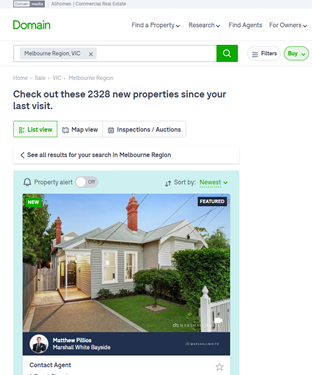

Step 2. Scan second listing page as shown in screen capture below and gather listing URL’s for each property  
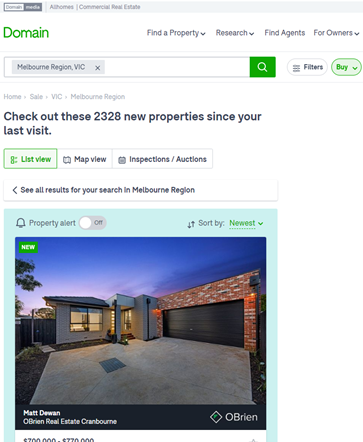

Step 3. Repeat steps until all the available listing pages were scanned for the listing links

Step 4. Access individual property listings as shown in the picture below via the URL’s gathered  
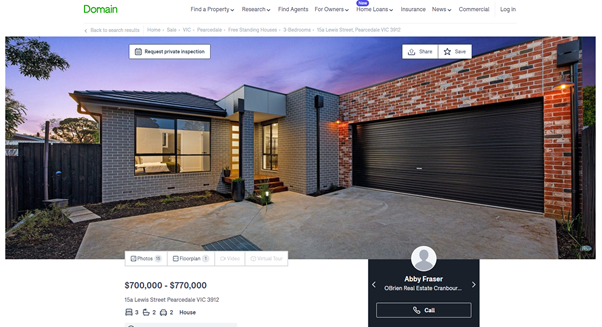

Step 5. Click on “read more” button to show full description  
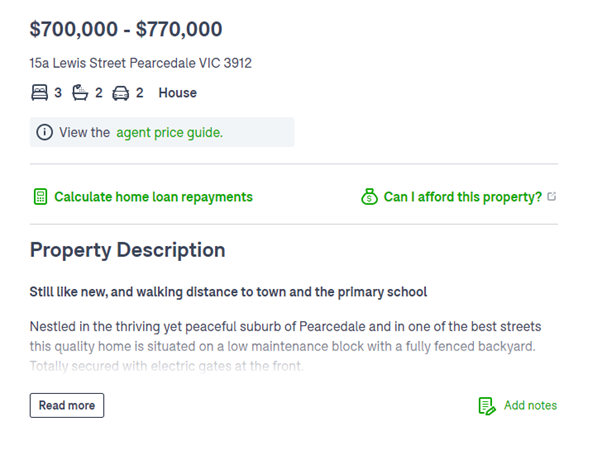

Step 6. Scan full description of the property listing  
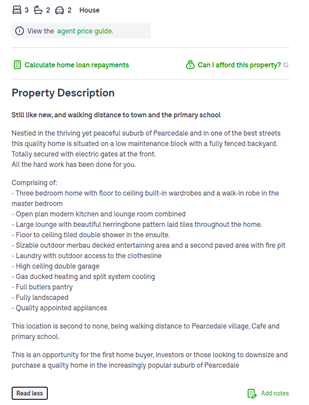

Step 7. Repeat steps 4 to 6 until all of the property descriptions have been gathered

**Whirlpool crawler demonstration:**  
Step 1. Access first page of comments for the “VIC property market and price discussion” forum  
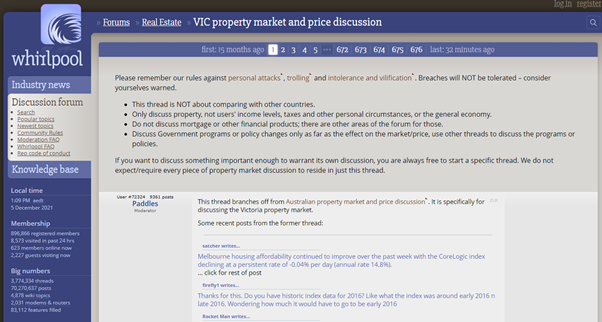

Step 2. Scan all comments on page   
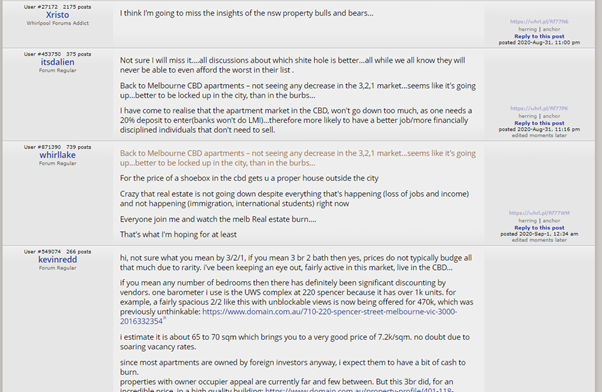

Step 3. Repeat steps 1 and 2 for the remaining forum pages  
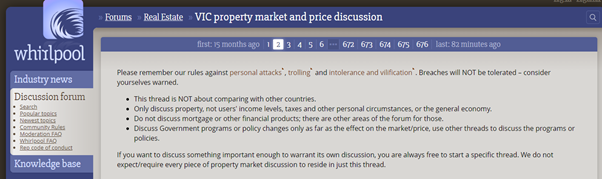

### i.	Methodology for processing, cleaning and storing harvested data
For both websites, python dictionaries were used to append the data to. The use of dictionaries was intended to make it easy to turn the data into a pandas dataframe once it had been compiled. Once the dictionaries were converted to a dataframe object, empty values were filtered by only selecting cells that had data in them. These dataframes were subsequently saved to the project directory using the to_csv() function from the pandas library.

### j.	Summary and visualisations of harvested data (Preliminary EDA)
**Summary of Domain data:**  

As we can see from the figure below (figure 2), there are a few stopwords that will need to be removed prior to undertaking further Natural Language Processing (NLP) tasks to make the data useable. Figure 3 shows the distribution of description length, this plot displays a reasonably tight distribution of length.

[nltk_data] Downloading package stopwords to C:\Users\Darcy
[nltk_data]     Richardson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darcy
[nltk_data]     Richardson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


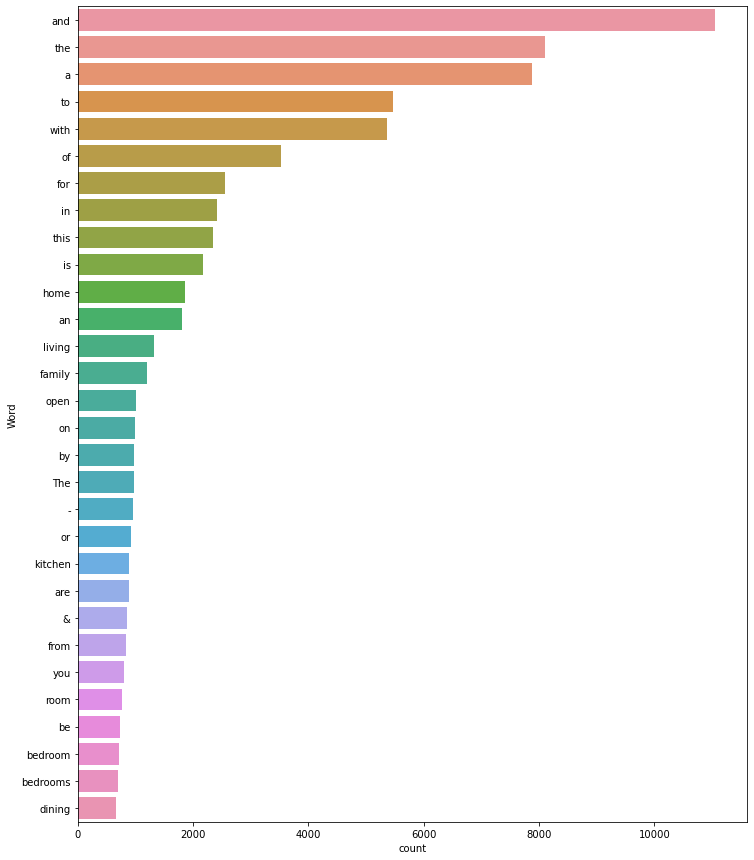

In [9]:
import pandas as pd
import nltk.corpus
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot  as plt
import seaborn            as sns

property_descriptions=pd.read_csv('G:\\My Drive\\Data science\\21-B-MA5851-ONL-EXT-SP86 Data Science Master Class 1\\Assessment 3\\descriptions.csv')

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
freq_words(property_descriptions['description'], 30)


Figure 2. Word counts of 30 most frequent words in description data

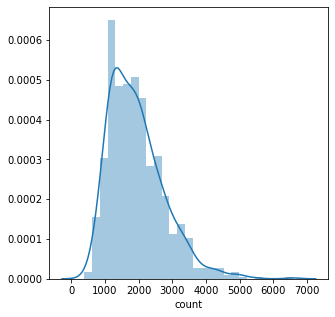

In [10]:
# EDA
description_lengths={'length':[]}
for i in range(len(property_descriptions)):
    length=len(property_descriptions.iloc[i,1])
    description_lengths['length'].append(length)

data = description_lengths['length'] #Generating data.
plt.figure(figsize = (5,5))
plot_dens=sns.distplot(data)
plot_dens.set(xlabel='count')

plt.show()

Figure 3. Distribution of character length of descriptions in data

**Summary of the Whirlpool data:**  

As shown in the below word count plot (figure 4), there is a significant amount of stopwords that require removal from the data. Interestingly, there doesn’t appear to be any words that refer to anything associated with real estate in the top thirty words which is contrasted with the description data which has some words associated. Figure 5 shows the distribution of comment length, interestingly, there appears to be some excessively long comments compared to the average.

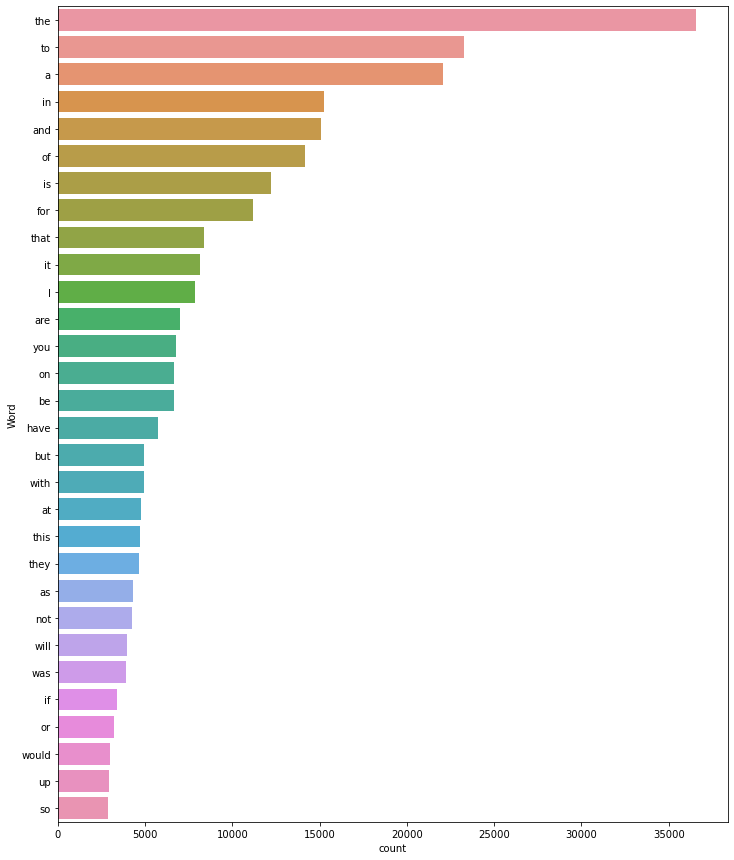

In [11]:
#Preliminary EDA
comments=pd.read_csv('G:\\My Drive\\Data science\\21-B-MA5851-ONL-EXT-SP86 Data Science Master Class 1\\Assessment 3\\comments.csv')

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
freq_words(comments['comment'], 30)

Figure 4. Word counts of 30 most frequent words in comment data

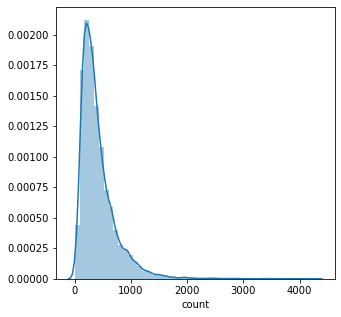

In [12]:
#Distribution of length
comment_lengths={'length':[]}
for i in range(len(comments)):
    length=len(comments.iloc[i,0])
    comment_lengths['length'].append(length)
    
 
data = comment_lengths['length'] #Generating data.
plt.figure(figsize = (5,5))
plot_dens=sns.distplot(data)
plot_dens.set(xlabel='count')

plt.show()

Figure 5. Distribution of character length of comments in data